In [10]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

DATASET_PATH = "audio_speech_emotion_dataset/"

emotion_map = {
    "03": "happy",
    "04": "sad",
    "05": "angry"
}
target_emotions = set(emotion_map.values())

def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfcc.T, axis=0)

features = []
emotions = []

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                parts = file.split("-")
                emotion_code = parts[2]
                emotion = emotion_map.get(emotion_code)
                if emotion in target_emotions:
                    try:
                        feature = extract_features(os.path.join(folder_path, file))
                        features.append(feature)
                        emotions.append(emotion)
                    except Exception as e:
                        print(f"Error processing {file}: {e}")

print(f"✅ Extracted features from {len(features)} files.")

X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(emotions))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")


✅ Extracted features from 24 files.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.1941 - loss: 56.9857 - val_accuracy: 0.4000 - val_loss: 10.2668
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2566 - loss: 26.7337 - val_accuracy: 0.4000 - val_loss: 25.0794
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1834 - loss: 54.3398 - val_accuracy: 0.4000 - val_loss: 32.5681
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2829 - loss: 49.6468 - val_accuracy: 0.4000 - val_loss: 24.6330
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4137 - loss: 37.7111 - val_accuracy: 0.4000 - val_loss: 8.0990
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5337 - loss: 25.5953 - val_accuracy: 0.4000 - val_loss: 8.1618
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1834 - loss: 31.4892 - val_accuracy: 0.4000 - val_loss: 10.2978
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5132 - loss: 10.5464 - val_accuracy: 0.4000 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


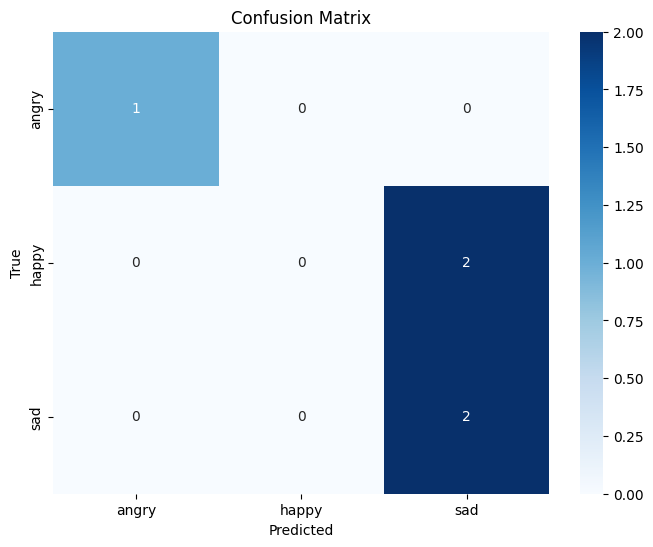

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import os

DATASET_PATH = "audio_speech_emotion_dataset/"
count = 0
for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                count += 1
print(f"Found {count} .wav files")


Found 60 .wav files


In [5]:
from google.colab import files
uploaded = files.upload()



Saving Actor_01.zip to Actor_01.zip


In [6]:
import zipfile
import os

with zipfile.ZipFile("Actor_01.zip", 'r') as zip_ref:
    zip_ref.extractall("audio_speech_emotion_dataset")

print("Files in extracted folder:", os.listdir("audio_speech_emotion_dataset"))


Files in extracted folder: ['Actor_01']


In [7]:
DATASET_PATH = "audio_speech_emotion_dataset/"
